In [1]:
import numpy as np
from qiskit import *
from qiskit import Aer
from qiskit.visualization import plot_state_city

In [2]:
# Création d'un circuit quantique à 8 qubits représentant les 4 personnes et les 4 raisonnements
circ = QuantumCircuit(8)

In [3]:
# Porte de Hadamard sur les quatres premiers qubits (personnes) pour permettre à toutes les possibilités de cohabiter
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)

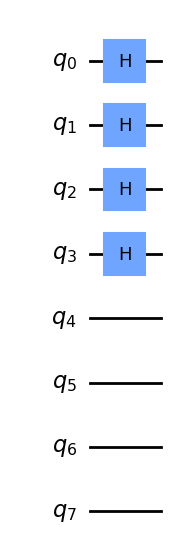

In [4]:
# Apercu du circuit
circ.draw('mpl')

In [5]:
# Ajout d'une séparation pour séparer les étapes
circ.barrier()

In [6]:
# Ajout de 3 portes CNOT permettant de calculer si il y a un nombre pair ou impair de cheveux indigo (1)
circ.cx(1,4)
circ.cx(2,4)
circ.cx(3,4)

In [7]:
circ.barrier()

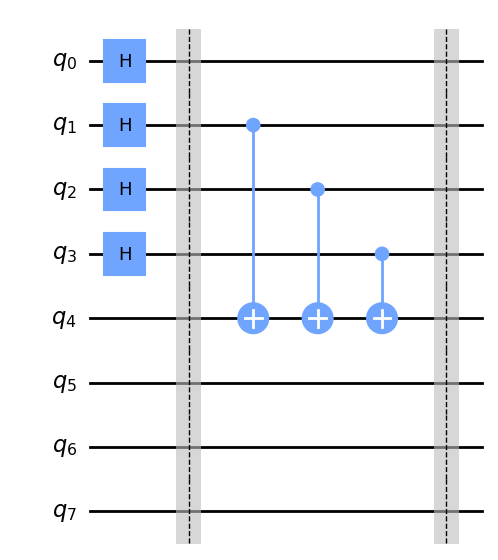

In [8]:
# Apercu du circuit après l'ajout des 3 portes
circ.draw('mpl')

In [9]:
# Ajout de 3 portes CNOT permettant de calculer la parité des cheveux indigo (1)
circ.cx(4,5)
circ.cx(4,6)
circ.cx(4,7)

In [10]:
circ.barrier()

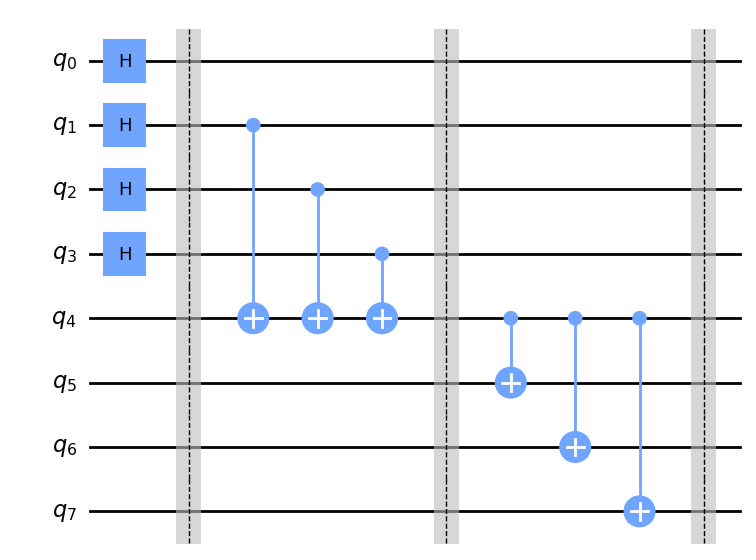

In [11]:
circ.draw('mpl')

In [12]:
# Ces deux portes permettent à Bob de deviner la couleur de ses cheveux en voyant les cheveux de la personne de devant
circ.cx(2,5)
circ.cx(3,5)

In [13]:
circ.barrier()

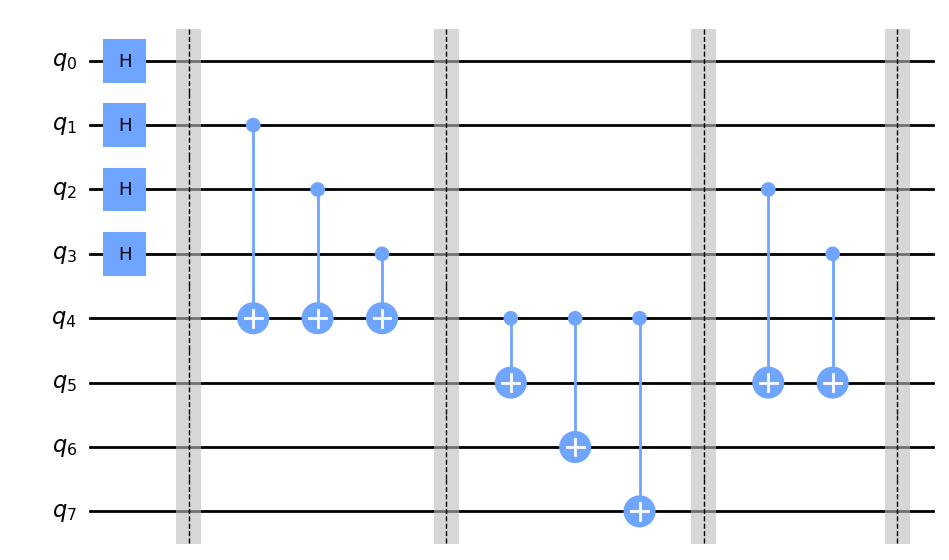

In [14]:
circ.draw('mpl')

In [15]:
# Permet aux deux participants restants de prendre en note la couleur des cheveux de Bob
circ.cx(5,6)
circ.cx(5,7)

In [16]:
circ.barrier()

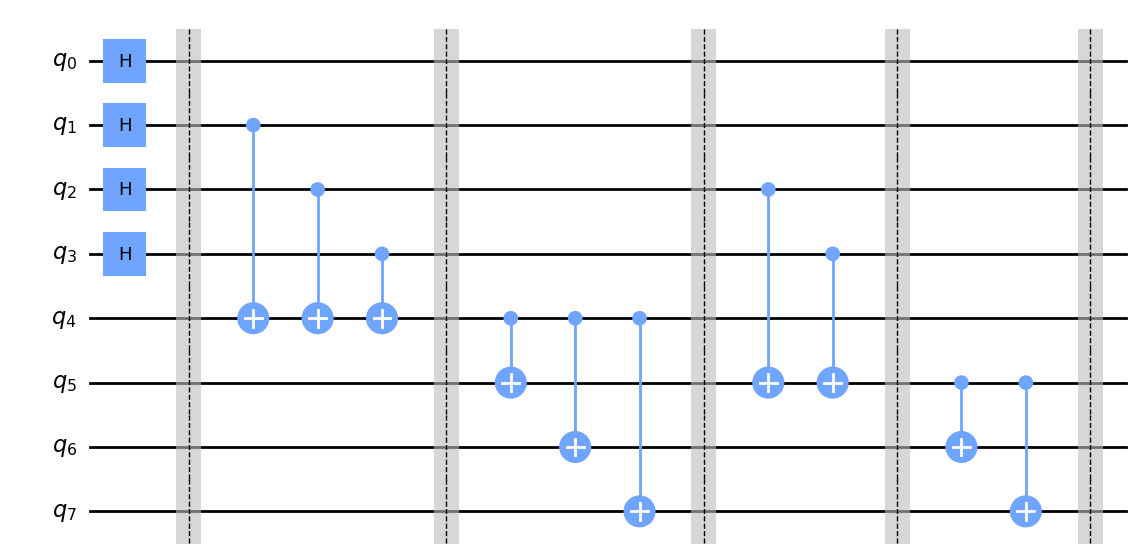

In [17]:
circ.draw('mpl')

In [18]:
# Permet à Charlie de noter la couleur des cheveux de la personne en face de lui et lui permet d'annoncer la couleur de ses propres cheveux
circ.cx(3,6)

In [19]:
circ.barrier()

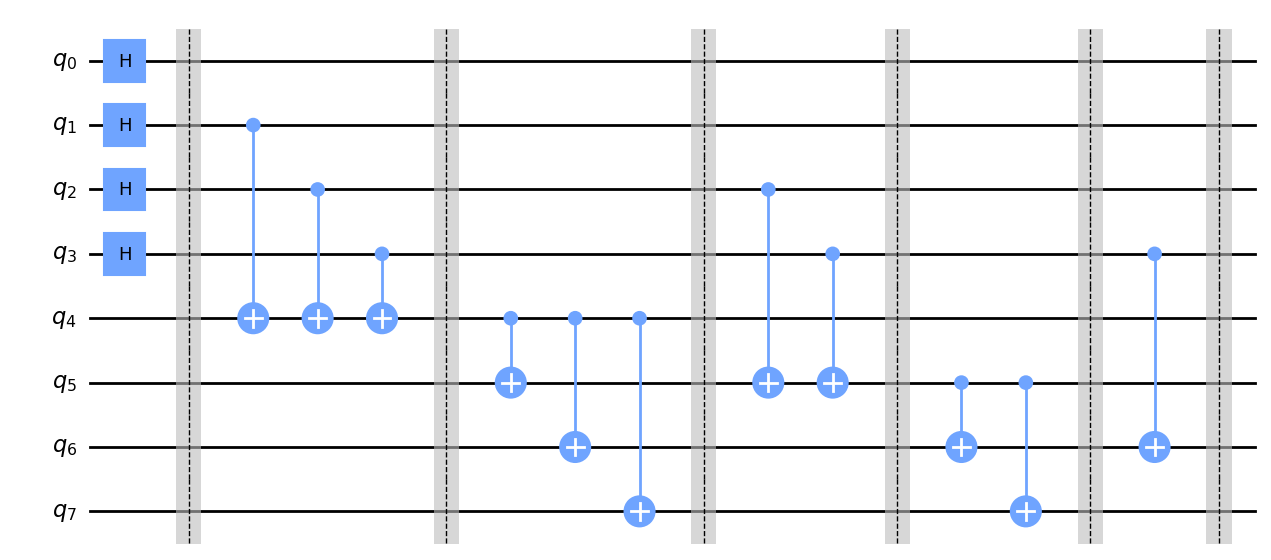

In [20]:
circ.draw('mpl')

In [21]:
# Enfin c'est au tour de Dalia d'annoncer la couleur de ses cheveux
circ.cx(6,7)

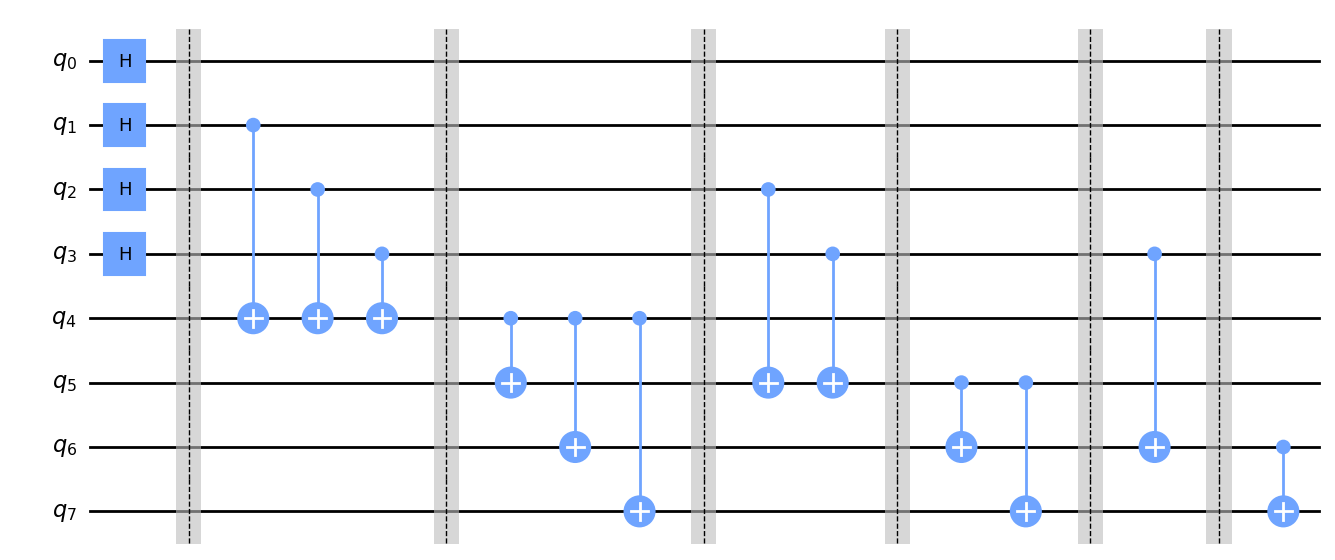

In [22]:
circ.draw('mpl')

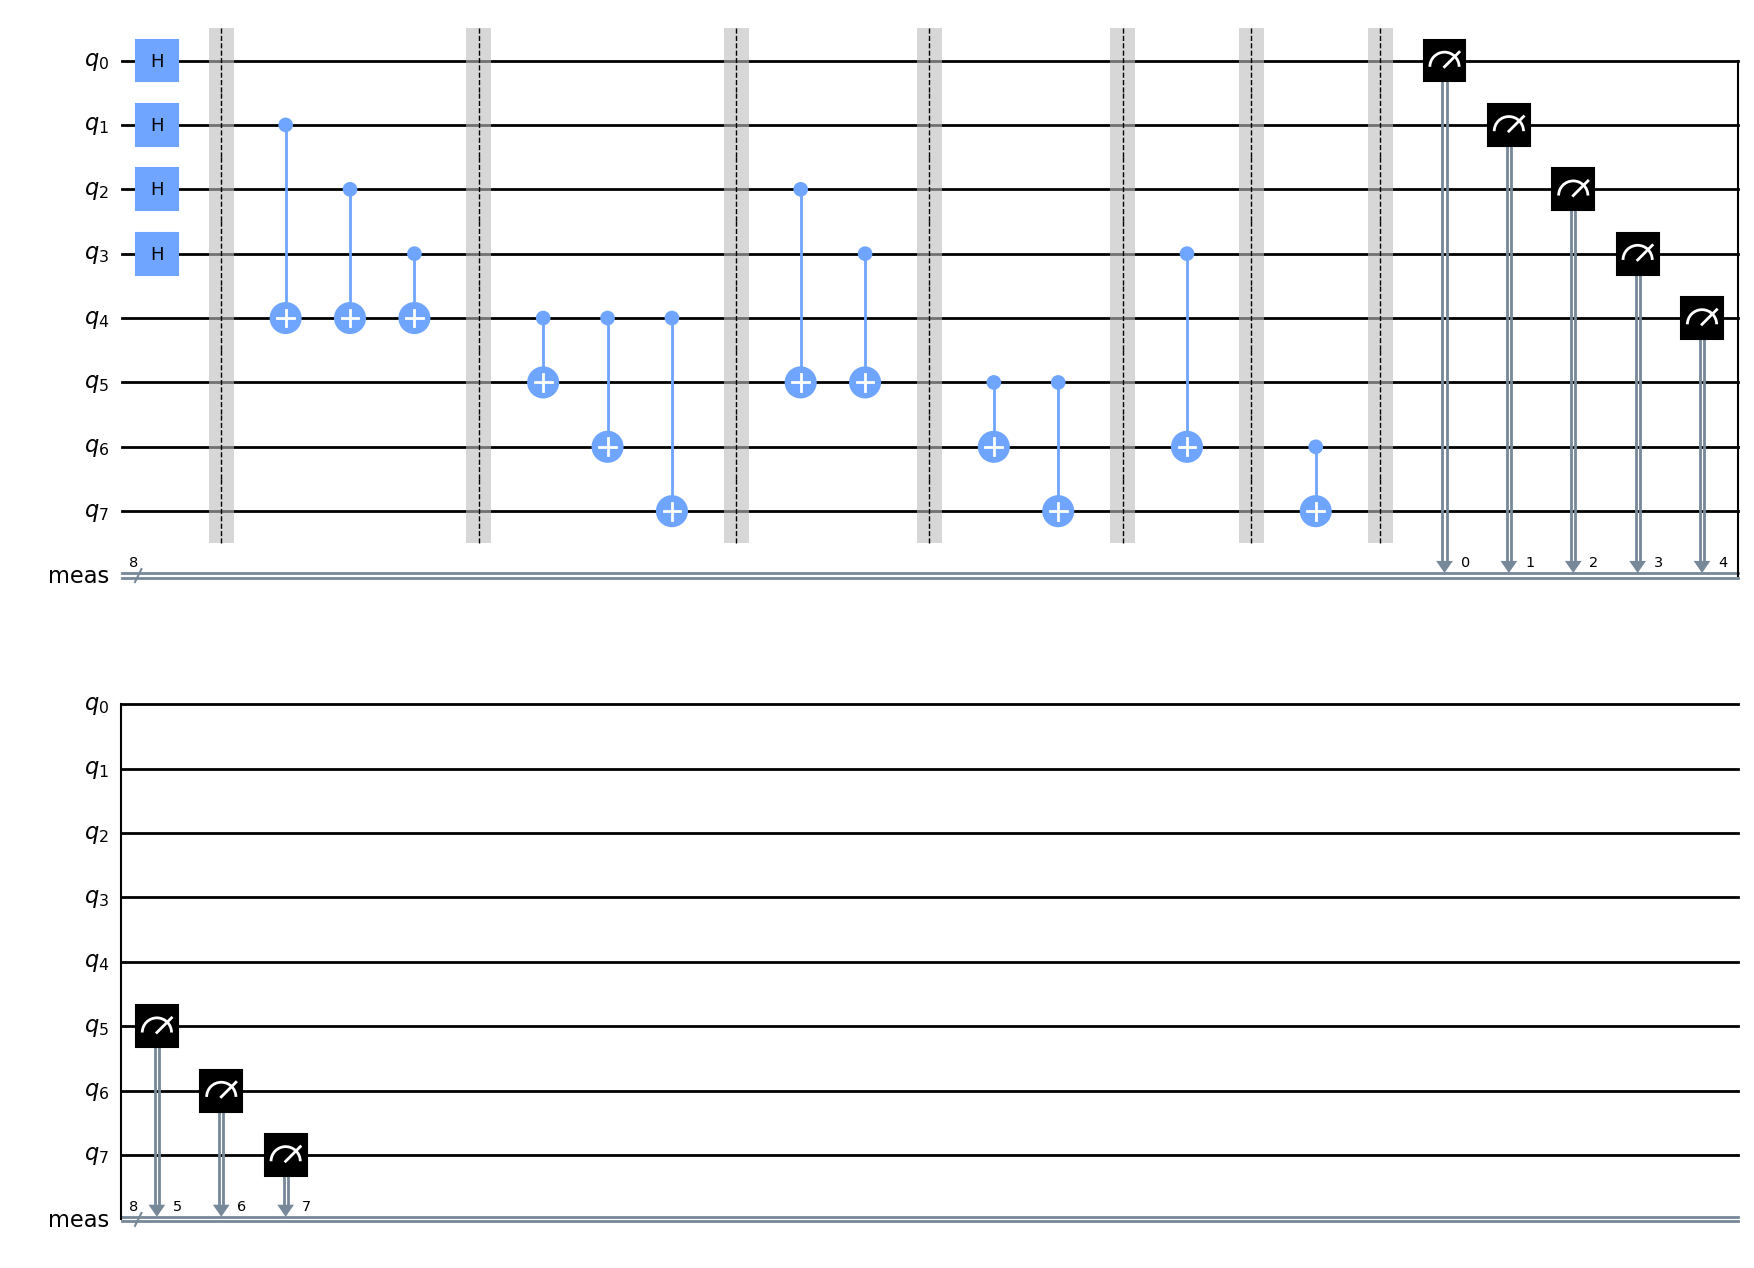

In [23]:
# Permet de mesurer tous les qubits du circuit donc de connaître 3 fois sur 4 les couleurs des cheveux
circ.measure_all()
circ.draw('mpl')

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.

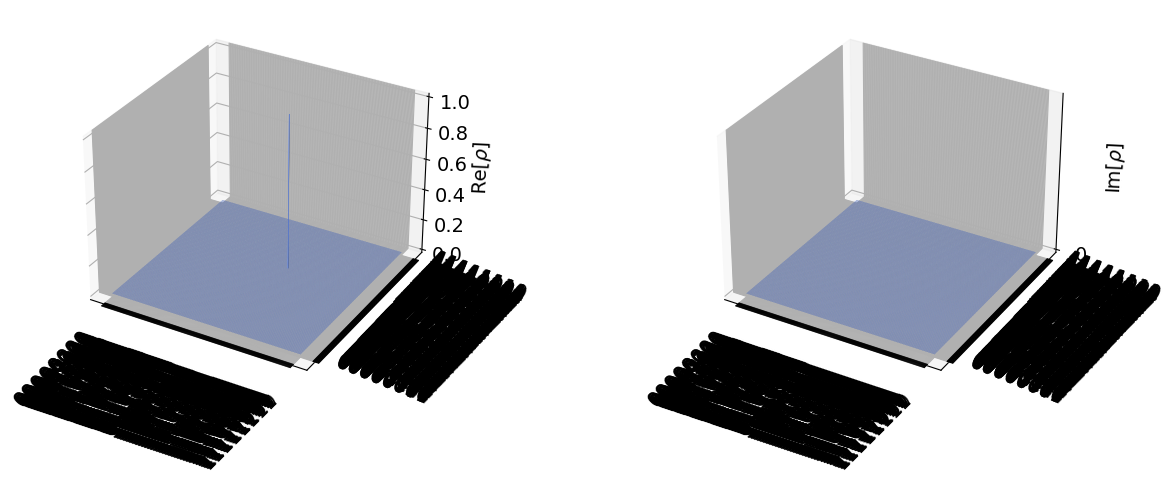

In [24]:
# Utilisation du backend 'statevector_simulator' de Qiskit pour simuler le circuit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
outputstate = result.get_statevector(circ,decimals=3)
print(outputstate)
# Représentation graphique de l'état final
plot_state_city(outputstate)